In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits import mplot3d
from matplotlib import gridspec

import numpy as np

# LASSO регрессия

**Лассо Тибширани** (англ.*LASSO - Least Absolute Shrinkage and Selection Operator*) - это метод понижения размерности, предложенный Тибширани в 1995г. Этот метод минимизирует RSS (*Residual Sum of Squares*) при условии, что сумма абсолютных значений коэффициентов меньше константы.

**Лассо-регрессия** - это метод регуляризации. Он используется вместо методов регрессии для более точного прогноза. В этой модели используется сокращение/сжатие (*shrinkage*). Сокращение (*shrinkage*) — это сжатие значений данных к центральной точке как к среднему значению.

Лассо-регрессия использует метод регуляризации *L1*.

*Постановка задачи:*

$$ ||X \cdot w - y||^2 + \beta  \sum_{j=1}^{n} |w_j|\to \min_{w}. $$



In [2]:
from scipy.optimize import minimize

def lasso_regression(X, y, alpha, mu=0):
    """
    Lasso regression implementation using SVD.

    Parameters:
        X: Input matrix of shape (n_samples, n_features).
        y: Target vector of shape (n_samples,).
        alpha: Regularization parameter (scalar).

    Returns:
        w: Lasso regression coefficients of shape (n_features,).
    """

    def lasso_loss(w, y):
        res = (np.linalg.norm(X @ w - y) ** 2) + alpha * np.sum(np.abs(w))
        return res

    n_samples, n_features = X.shape

    w0 = np.array([mu, mu])

    minimize_result = []

    for i in range(n_features):
      result = minimize(lasso_loss, w0, args = (y[:, i]))
      w = result.x
      minimize_result.append(w.tolist())

    minimize_result = np.array(minimize_result)
    minimize_result = minimize_result.T
    return minimize_result

## Значения весов при параметре регуляризации $ \beta=0 $

In [ ]:
n = 2
l = 100
K = 2
beta = 0.

X = np.random.randn(l, n)
W_true = np.random.randn(n, K)

y = X@W_true + beta*np.random.randn(l, K)

w = lasso_regression(X, y, beta, 0.15)
w

array([[-1.51518538,  0.14213037],
       [-0.5544843 , -1.4420248 ]])

## Зависимость среднеквадратичной ошибки от параметра регуляризации $\beta$

В данном случае параметр регуляризации $\beta$ меняется от 0 до 10.

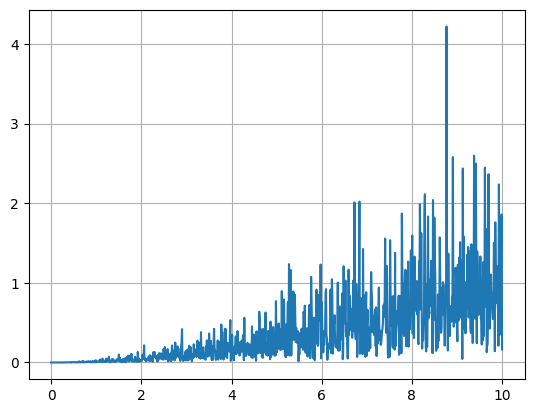

In [ ]:
betas = np.linspace(0, 10, 1000)
list_of_errors = []

for beta in betas:
    y = X@W_true + beta*np.random.randn(l, K)

    W = lasso_regression(X, y, beta, 0.15)

    list_of_errors.append(((W-W_true)**2).mean())

plt.plot(betas, list_of_errors)
plt.grid()
plt.show()

## Зависимость среднеквадратичной ошибки от изначального значения весов $\mu$

В данном случае параметр $\mu$ меняется от 0 до 2.

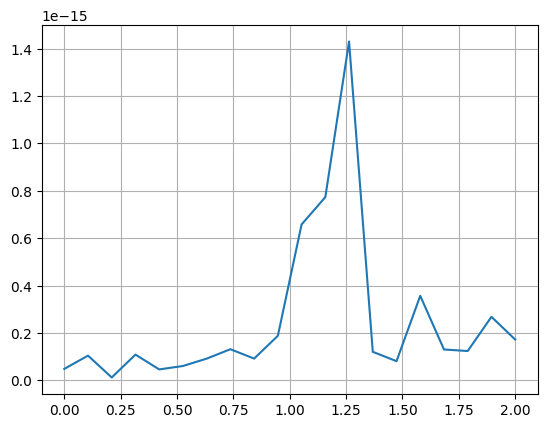

In [ ]:
beta = 0.
mus = np.linspace(0, 2, 20)
list_of_errors = []

y = X@W_true + beta*np.random.randn(l, K)

for mu in mus:

    W = lasso_regression(X, y, beta, mu)

    list_of_errors.append(((W-W_true)**2).mean())

plt.plot(mus, list_of_errors)

plt.grid()
plt.show()

## Зависимость параметра регуляризации $\beta$ от значения весов $\mu$

In [ ]:
mus = np.linspace(0., 1., 100)
betas = np.linspace(0., 2., 100)
list_of_errors = dict()

for beta in betas:
    list_of_errors[str(beta)] = dict()

    for mu in mus:

        y = X@W_true + beta*np.random.randn(l, K)

        W = lasso_regression(X, y, beta, mu)

        list_of_errors[str(beta)][str(mu)] = ((W-W_true)**2).mean()

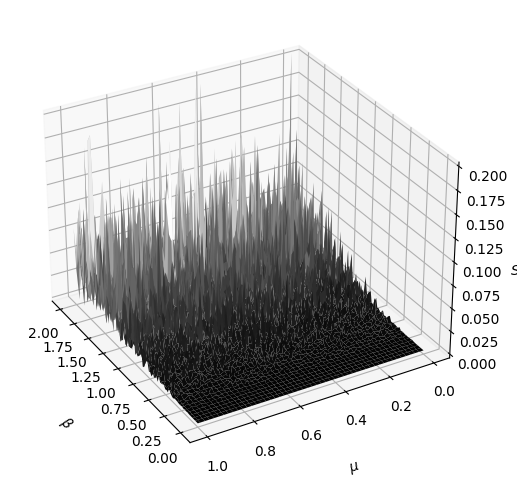

In [ ]:
BETAS, MUS = np.meshgrid(betas, mus)
scores = np.zeros_like(BETAS)
for i in range(len(BETAS)):
    for j in range(len(BETAS[i])):
        scores[i][j] = list_of_errors[str(BETAS[i][j])][str(MUS[i][j])]

fig = plt.figure(figsize=(14.0, 6.0))
ax = plt.axes(projection='3d')
ax.plot_surface(BETAS, MUS, scores, cmap='gist_gray', alpha=0.99)
ax.set_xlabel(r'$\beta$', labelpad= 14), ax.set_ylabel(r'$\mu$', labelpad= 14)
ax.set_zlabel(r'$S$'), ax.set_zlim((0, 0.2)), ax.view_init(30, 150)

plt.show()

In [ ]:
mus = np.linspace(0., 1., 100)
betas = np.linspace(0., 2., 100)
list_of_errors = dict()

for beta in betas:
    list_of_errors[str(beta)] = dict()
    for mu in mus:
        y = X@W_true + beta*np.random.randn(l, K)

        W = lasso_regression(X, y, beta, mu)

        list_of_errors[str(beta)][str(mu)] = ((y-X@W)**2).mean()

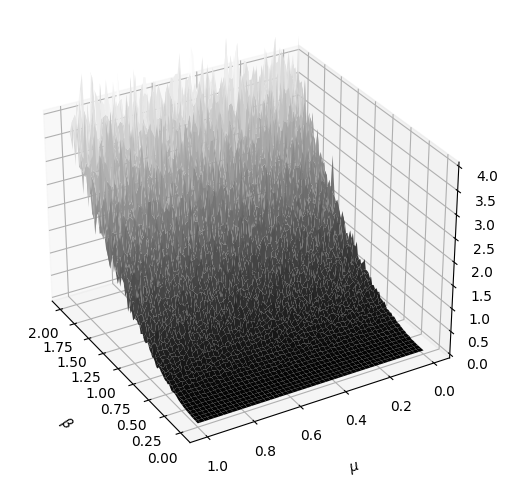

In [ ]:
BETAS, MUS = np.meshgrid(betas, mus)
scores = np.zeros_like(BETAS)
for i in range(len(BETAS)):
    for j in range(len(BETAS[i])):
        scores[i][j] = list_of_errors[str(BETAS[i][j])][str(MUS[i][j])]

fig = plt.figure(figsize=(14.0, 6.0))
ax = plt.axes(projection='3d')
ax.plot_surface(BETAS, MUS, scores, cmap='gist_gray', alpha=0.99)
ax.set_xlabel(r'$\beta$', labelpad= 14), ax.set_ylabel(r'$\mu$', labelpad= 14)
ax.set_zlabel(r'$S$'), ax.set_zlim((0, 4)), ax.view_init(30, 150)

plt.show()